<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/Convert_signals_to_Continuous_Wavelet_Transform_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Continuous Wavelet Transform (CWT)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.1 MB/s eta 0:00:00


In [3]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import mne

In [5]:
# Load the raw EEG data
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf', preload=True)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...


In [6]:
# Pick only EEG channels
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawGDF | A1_CE_baseline.gdf, 32 x 95776 (187.1 s), ~23.4 MB, data loaded>

In [7]:
# Extract data and times
data, times = raw[:]

In [8]:
# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]

In [9]:
# Define the sampling frequency
fs = raw.info['sfreq']

In [10]:
# Define the wavelet and scales
wavelet = 'cmor'
scales = np.arange(1, 128)

In [11]:
# Perform the Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(channel_data, scales, wavelet, sampling_period=1/fs)

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


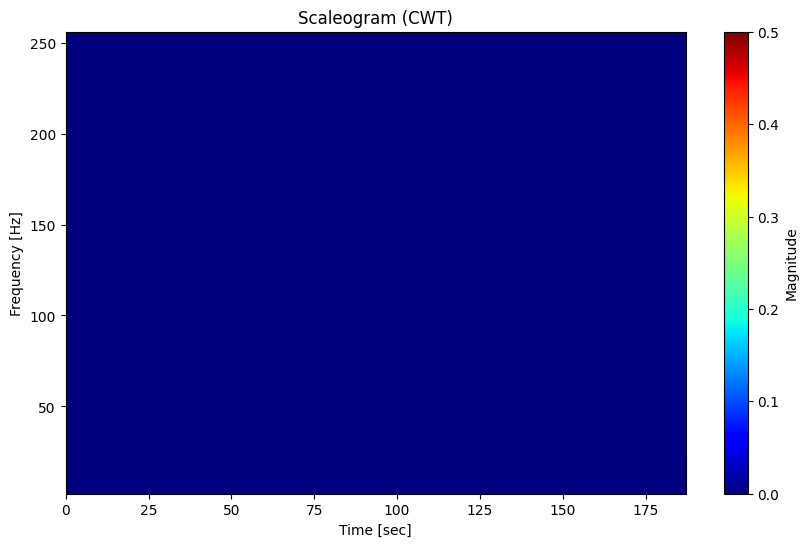

In [12]:
# Plot the scaleogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='jet', aspect='auto', vmax=0.5)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Scaleogram (CWT)')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade mne

In [4]:
!pip install pywavelets

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import mne

In [9]:
# Define the input and output directories
input_folder_path = '/content/drive/MyDrive/BCI_Database/gdf'
output_folder_path = '/content/drive/MyDrive/BCI_Database/gdf/CWT_Images'

In [7]:
# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Loop through all files in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.gdf'):
        # Construct the full file path
        file_path = os.path.join(input_folder_path, filename)

        # Load the .gdf file
        raw = mne.io.read_raw_gdf(file_path, preload=True)

        # Pick only EEG channels
        raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

        # Extract data and times
        data, times = raw[:]

        # Define the sampling frequency
        fs = raw.info['sfreq']

        # Define the wavelet and scales
        wavelet = 'cmor'
        scales = np.arange(1, 128)

        # Loop through each channel in the data
        for i, channel_data in enumerate(data):
            # Perform the Continuous Wavelet Transform (CWT)
            coefficients, frequencies = pywt.cwt(channel_data, scales, wavelet, sampling_period=1/fs)

            # Plot the scaleogram
            plt.figure(figsize=(10, 6))
            plt.imshow(np.abs(coefficients), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='jet', aspect='auto', vmax=0.5)
            plt.colorbar(label='Magnitude')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.title(f'Scaleogram (CWT) - {filename} - Channel {i}')

            # Save the plot as an image
            plot_file_path = os.path.join(output_folder_path, f'scaleogram_{filename}_channel_{i}.png')
            plt.savefig(plot_file_path)
            plt.close()

        print(f'Scaleograms created and saved for {filename} in {output_folder_path}')

print('Scaleogram visualization complete for all .gdf files in the folder.')

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Scaleograms created and saved for A1_CE_baseline.gdf in /content/drive/MyDrive/BCI_Database/gdf/CWT_Images
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/C85_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ...   450.061 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Scaleograms created and saved for C85_R2_acquisition.gdf in /content/drive/MyDrive/BCI_Database/gdf/CWT_Images
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A4_R3_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz,